## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## EDA

In [7]:
df.shape

(398, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [11]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [13]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [15]:
df.dropna(inplace=True)

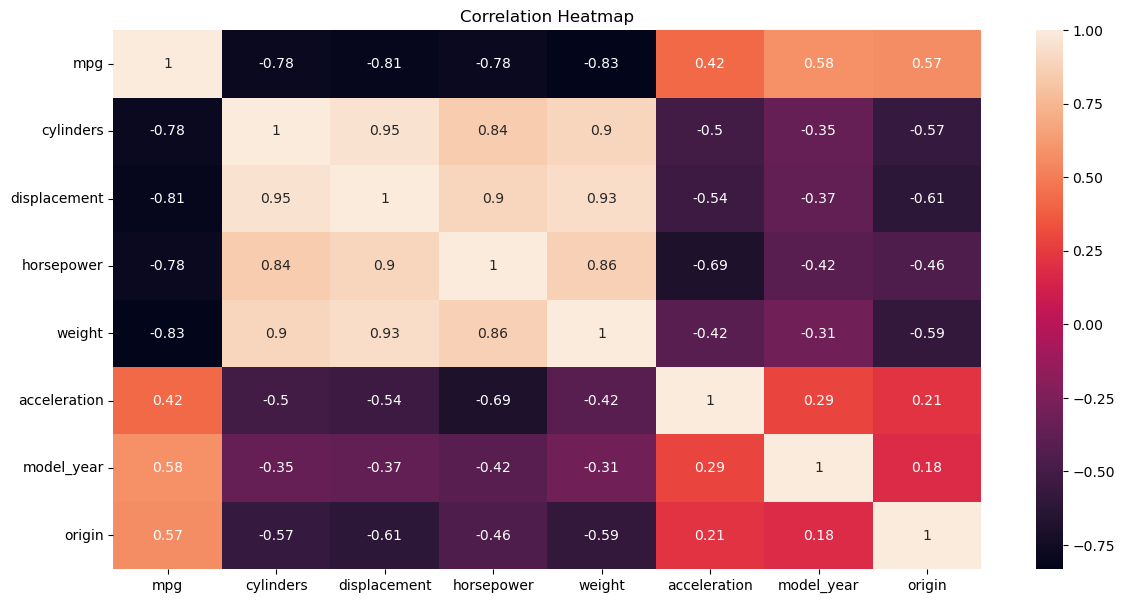

In [17]:
dff = df.drop('car_name', axis=1) 
plt.figure(figsize=(14, 7))
sns.heatmap(dff.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

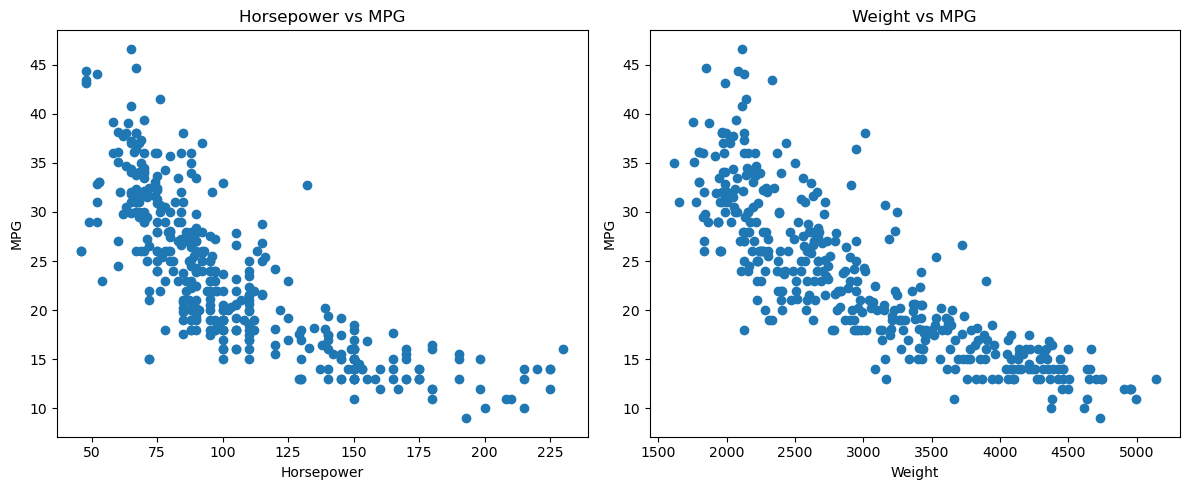

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].scatter(df['horsepower'], df['mpg'])
axes[0].set_xlabel('Horsepower')
axes[0].set_ylabel('MPG')
axes[0].set_title('Horsepower vs MPG')

axes[1].scatter(df['weight'], df['mpg'])
axes[1].set_xlabel('Weight')
axes[1].set_ylabel('MPG')
axes[1].set_title('Weight vs MPG')

plt.tight_layout()
plt.show()

## Data Preprocessing

In [21]:
features = dff[['weight', 'displacement', 'horsepower', 'cylinders']]
target = dff['mpg']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
df_scaled['mpg'] = target.reset_index(drop=True)


X = df_scaled[['weight', 'displacement', 'horsepower', 'cylinders']]
y = df_scaled['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression Model

In [23]:
# Training a linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Making predictions using the test set
y_pred = model.predict(x_test)

# Calculating the performance metrics: Mean Squared Error and R^2 Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 17.89
R^2 Score: 0.65


## Data Visualization

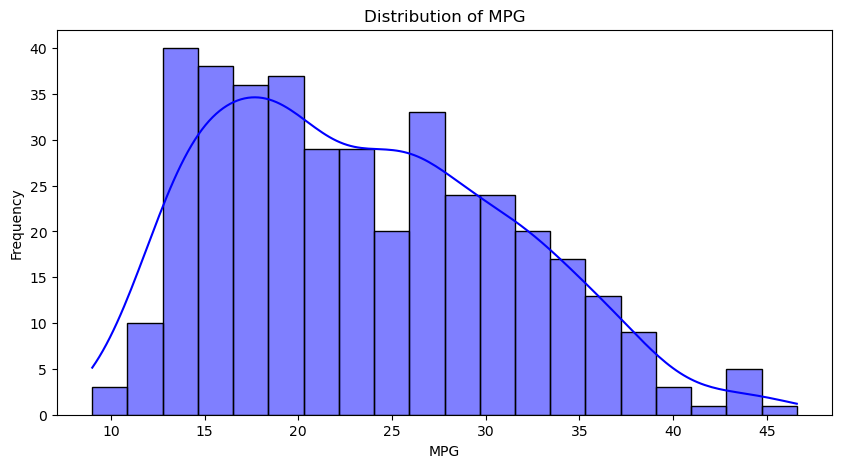

Skewness of mpg: 0.46


In [25]:
plt.figure(figsize=(10, 5))
sns.histplot(dff['mpg'], kde=True, bins=20, color='blue')
plt.title('Distribution of MPG')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.show()

# Check skewness
print(f"Skewness of mpg: {dff['mpg'].skew():.2f}")

In [27]:
dff['mpg'] = np.log(dff['mpg'])

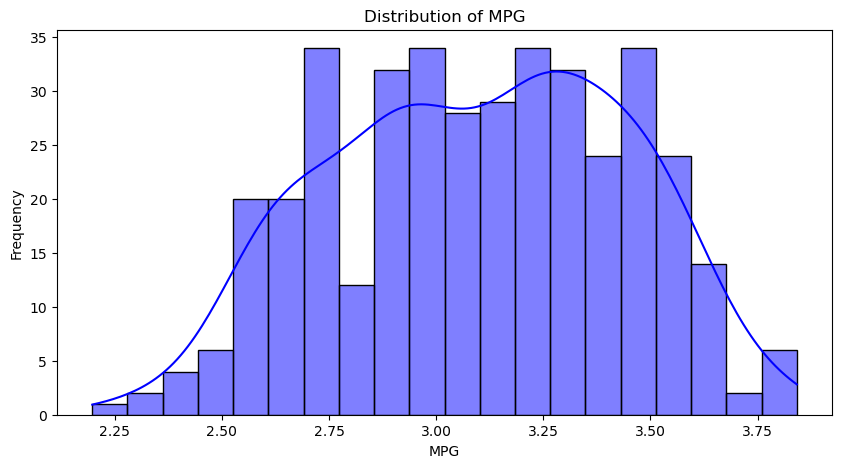

Skewness of mpg: -0.13


In [29]:
plt.figure(figsize=(10, 5))
sns.histplot(dff['mpg'], kde=True, bins=20, color='blue')
plt.title('Distribution of MPG')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.show()

# Check skewness
print(f"Skewness of mpg: {dff['mpg'].skew():.2f}")

## Polynomial Features

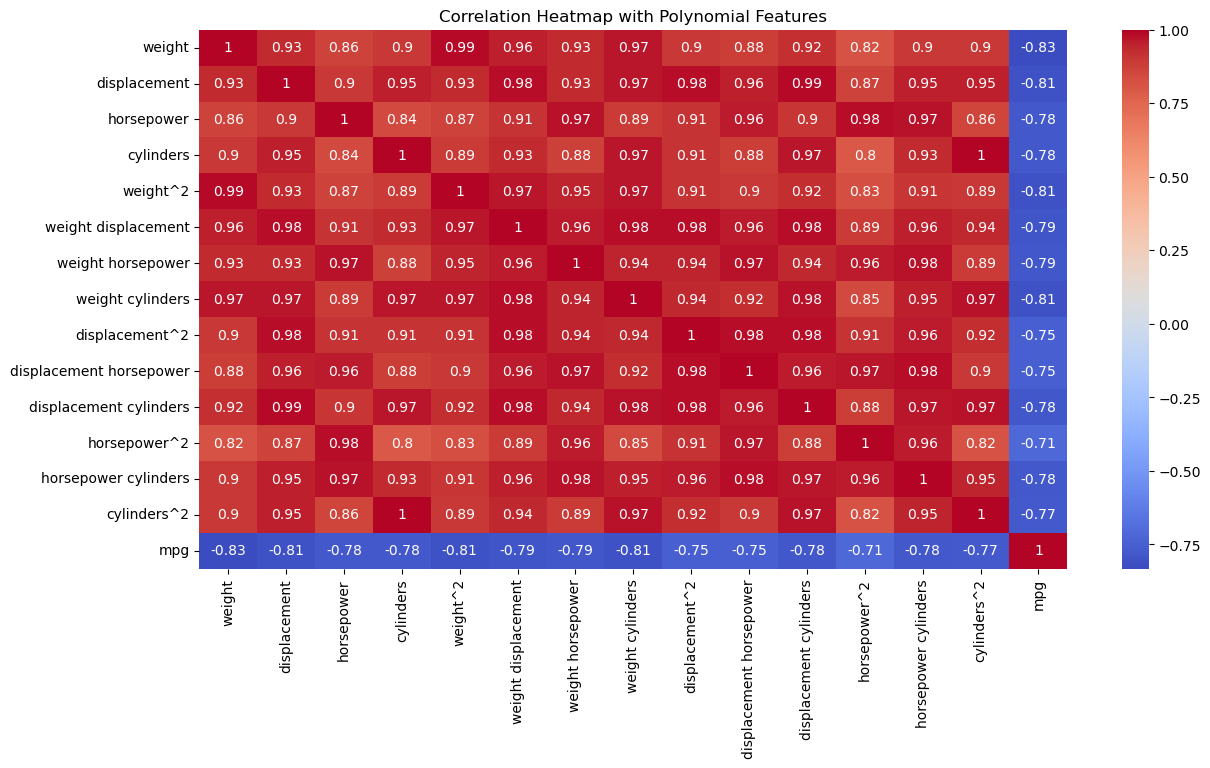

In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
poly_features = poly.fit_transform(features)

poly_feature_names = poly.get_feature_names_out(features.columns)
df_poly = pd.DataFrame(poly_features, columns=poly_feature_names)

df_poly['mpg'] = target.reset_index(drop=True)

plt.figure(figsize=(14, 7))
sns.heatmap(df_poly.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap with Polynomial Features")
plt.show()

## Polynomial Regression Model

In [33]:
X_poly = df_poly.drop('mpg', axis=1)
y_poly = df_poly['mpg']

x_train_poly, x_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y_poly, test_size=0.2, random_state=42)

model_poly = LinearRegression()
model_poly.fit(x_train_poly, y_train_poly)
y_pred_poly = model_poly.predict(x_test_poly)

mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)

print(f"Polynomial Regression - Mean Squared Error: {mse_poly:.2f}")
print(f"Polynomial Regression - R^2 Score: {r2_poly:.2f}")

Polynomial Regression - Mean Squared Error: 17.09
Polynomial Regression - R^2 Score: 0.67


## Visualization of Polynomial Regression

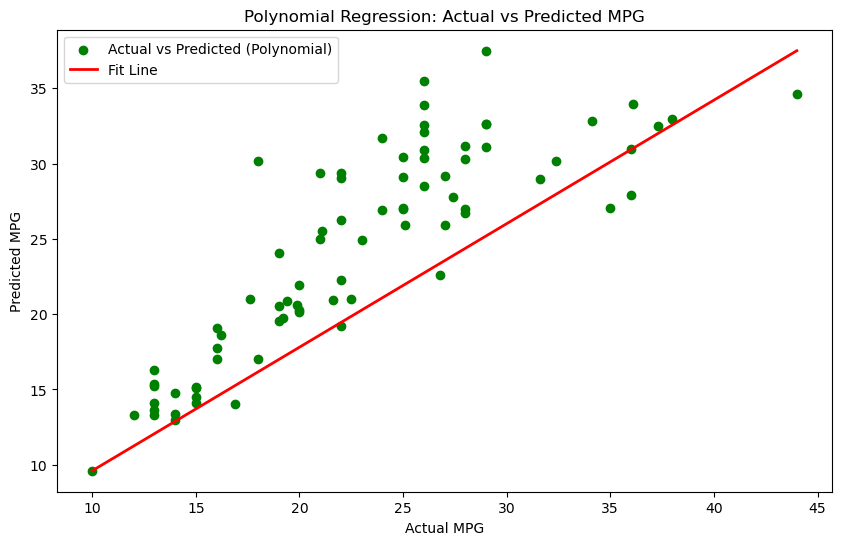

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_poly, y_pred_poly, color='green', label='Actual vs Predicted (Polynomial)')
plt.plot([min(y_test_poly), max(y_test_poly)], [min(y_pred_poly), max(y_pred_poly)], color='red', linewidth=2, label='Fit Line')
plt.title('Polynomial Regression: Actual vs Predicted MPG')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.legend()
plt.show()